# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [2]:
print("""Генератор random инициализированный с теми же начальными условиями, выдает идентичные случайные величины.
Если не зафиксировать начальные условия генератора, то при каждом перезапуске (например, проверяющим),
он будет выдавать другие случайные значения и результаты вычислений изменятся, что крайне неудобно.""")

Генератор random инициализированный с теми же начальными условиями, выдает идентичные случайные величины.
Если не зафиксировать начальные условия генератора, то при каждом перезапуске (например, проверяющим),
он будет выдавать другие случайные значения и результаты вычислений изменятся, что крайне неудобно.


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [4]:
# 10 случайных строк
df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [5]:
# строки: 5 первых и 5 последних 
df_test
# pd.concat([df_test.head(5), df_test.tail(5)]) # - или так еще, как вариант

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [6]:
# статистика для train
pd.options.display.float_format = '{:.0f}'.format
df_train.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,6999,6999,6999,6999,6999,6999,6999,6999,6797,6797,6803,6796,6797
unique,1924,NaN,NaN,NaN,4,3,2,5,386,120,316,419,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,116,NaN,NaN,NaN,3793,5826,6095,4587,197,885,330,468,NaN
mean,NaN,2014,639515,69585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
std,NaN,4,808942,57724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
min,NaN,1983,29999,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
25%,NaN,2011,254999,35000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
50%,NaN,2015,450000,60000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
75%,NaN,2017,675000,97000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5


In [7]:
# статистика для test
pd.options.display.float_format = '{:.0f}'.format
df_test.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,1000,1000,1000,1000,1000,1000,1000,1000,981,981,981,981,981
unique,621,NaN,NaN,NaN,4,3,2,5,237,88,182,226,NaN
top,Maruti Alto 800 LXI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm,NaN
freq,15,NaN,NaN,NaN,534,837,877,623,23,116,43,57,NaN
mean,NaN,2014,617901,71393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
std,NaN,4,758554,48486,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
min,NaN,1995,31000,1303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
25%,NaN,2011,250000,37000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
50%,NaN,2014,434999,61500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
75%,NaN,2017,670000,100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [8]:
# можно посмотреть число пропусков так:
print('Train data - пропуски есть в колонках (число пропусков): mileage(202), engine(202), max_power(196), torque(203), seats(202)')
-df_train.count() + df_train.shape[0]

Train data - пропуски есть в колонках (число пропусков): mileage(202), engine(202), max_power(196), torque(203), seats(202)


name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

In [9]:
# можно посмотреть число пропусков так:
print('Test data - пропуски есть в колонках (число пропусков): mileage(19), engine(19), max_power(19), torque(19), seats(19)')
-df_test.count() + df_test.shape[0]

Test data - пропуски есть в колонках (число пропусков): mileage(19), engine(19), max_power(19), torque(19), seats(19)


name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
torque           19
seats            19
dtype: int64

(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [10]:
# объекты с одинаковым признаковым описанием
print('Число объектов с одинаковым признаковым описанием:')
len(df_train)-len(df_train.drop(['selling_price'], axis=1).drop_duplicates(keep=False))
# df_train.drop(['selling_price'], axis=1).duplicated(keep=False).value_counts() #- тоже вариант посчитать такие объекты

Число объектов с одинаковым признаковым описанием:


1799

(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [11]:
# объекты с одинаковым признаковым описанием
df_train_nodupl = df_train.drop(['selling_price'], axis=1).drop_duplicates(keep=False)
df_train_dupl = df_train.drop(df_train_nodupl.index.tolist(),axis=0)
df_train_dupl

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
22,Maruti Baleno Delta 1.2,2016,575000,45000,Petrol,Individual,Manual,First Owner,21.4 kmpl,1197 CC,83.1 bhp,115Nm@ 4000rpm,5
26,Maruti Omni E MPI STD BS IV,2018,254999,25000,Petrol,Individual,Manual,First Owner,16.8 kmpl,796 CC,34.2 bhp,59Nm@ 2500rpm,8
27,Maruti Vitara Brezza LDi Option,2017,670000,70000,Diesel,Individual,Manual,First Owner,24.3 kmpl,1248 CC,88.5 bhp,200Nm@ 1750rpm,5
28,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
29,Maruti Omni 8 Seater BSIV,2012,150000,35000,Petrol,Individual,Manual,Second Owner,14.0 kmpl,796 CC,35 bhp,6.1kgm@ 3000rpm,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6981,Ford Freestyle Titanium Plus Diesel BSIV,2018,750000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,746000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [12]:
# удалим повторяющиеся строки
df = df_train.drop(['selling_price'], axis=1).drop_duplicates(keep='first')
df_train = df_train.loc[df.index.tolist()]
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6992,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5
6993,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5
6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5
6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5


In [13]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [14]:
# обновим индексы
df_train.reset_index(drop=True, inplace=True)
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5


Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [15]:
# на разделение torque не хватило времени

# mileage, engine, max_power to float
pd.options.display.float_format = '{:.2f}'.format

df_train['mileage'] = df_train['mileage'].str.replace(r'[/ a-zA-Z]', '').replace('',np.nan).astype(float)
df_train['engine'] = df_train['engine'].str.replace(r'[/ a-zA-Z]', '').replace('',np.nan).astype(float)
df_train['max_power'] = df_train['max_power'].str.replace(r'[/ a-zA-Z]', '').replace('',np.nan).astype(float)

df_test['mileage'] = df_test['mileage'].str.replace(r'[/ a-zA-Z]', '').replace('',np.nan).astype(float)
df_test['engine'] = df_test['engine'].str.replace(r'[/ a-zA-Z]', '').replace('',np.nan).astype(float)
df_test['max_power'] = df_test['max_power'].str.replace(r'[/ a-zA-Z]', '').replace('',np.nan).astype(float)


C:\Users\Илья\AppData\Local\Temp\ipykernel_11092\149915784.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df_train['mileage'] = df_train['mileage'].str.replace(r'[/ a-zA-Z]', '').replace('',np.nan).astype(float)
C:\Users\Илья\AppData\Local\Temp\ipykernel_11092\149915784.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df_train['engine'] = df_train['engine'].str.replace(r'[/ a-zA-Z]', '').replace('',np.nan).astype(float)
C:\Users\Илья\AppData\Local\Temp\ipykernel_11092\149915784.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df_train['max_power'] = df_train['max_power'].str.replace(r'[/ a-zA-Z]', '').replace('',np.nan).astype(float)
C:\Users\Илья\AppData\Local\Temp\ipykernel_11092\149915784.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  df_test['mileage'] = df_test['milea

In [16]:
# # deal with torque, convert to torque и max_torque_rpm
# df_train['max_torque_rpm'] = df_train['torque'].str.find(r'\d+rpm') 
# #replace(r'[/ a-zA-Z]', '').replace('',np.nan).astype(float)
# df_train

In [17]:
# удалим torque 
df_train = df_train.drop(['torque'], axis=1)
df_test = df_test.drop(['torque'], axis=1)
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.00,74.00,5.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.00,103.52,5.00
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.00,90.00,5.00
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.00,88.20,5.00
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.00,81.86,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92,1086.00,62.10,5.00
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.00,67.10,5.00
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.00,82.85,5.00
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.00,110.00,5.00


(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [18]:
# заполним и -> NaN и пропуски -> медианами
# возможно, 0 лучше оставить 0, или совсем исключить строки с 0

df_train['mileage'] = df_train['mileage'].replace(0,np.NaN)
df_train['max_power'] = df_train['max_power'].replace(0,np.NaN)

df_train['mileage'].fillna(value=df_train['mileage'].mean(), inplace=True)
df_train['engine'].fillna(value=df_train['engine'].mean(), inplace=True)
df_train['max_power'].fillna(value=df_train['max_power'].mean(), inplace=True)
df_train['seats'].fillna(value=df_train['seats'].mean(), inplace=True)

df_train.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
count,5840,5840.00,5840.00,5840.00,5840,5840,5840,5840,5840.00,5840.00,5840.00,5840.00
unique,1924,NaN,NaN,NaN,4,3,2,5,NaN,NaN,NaN,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN
freq,91,NaN,NaN,NaN,3177,5223,5336,3603,NaN,NaN,NaN,NaN
mean,NaN,2013.43,522960.09,73952.24,NaN,NaN,NaN,NaN,19.48,1435.42,88.15,5.44
std,NaN,4.10,535432.00,60071.14,NaN,NaN,NaN,NaN,3.87,484.55,31.56,0.98
min,NaN,1983.00,29999.00,1.00,NaN,NaN,NaN,NaN,9.00,624.00,32.80,2.00
25%,NaN,2011.00,250000.00,39000.00,NaN,NaN,NaN,NaN,17.00,1197.00,68.00,5.00
50%,NaN,2014.00,405000.00,70000.00,NaN,NaN,NaN,NaN,19.48,1248.00,82.00,5.00
75%,NaN,2017.00,640000.00,100000.00,NaN,NaN,NaN,NaN,22.30,1498.00,99.00,5.00


In [19]:
# проверим типы столбцов
df_train.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
seats            float64
dtype: object

In [20]:
# обработаем аналогично test
df_test['mileage'] = df_test['mileage'].replace(0,np.NaN)

df_test['mileage'].fillna(value=df_train['mileage'].mean(), inplace=True)
df_test['engine'].fillna(value=df_train['engine'].mean(), inplace=True)
df_test['max_power'].fillna(value=df_train['max_power'].mean(), inplace=True)
df_test['seats'].fillna(value=df_train['seats'].mean(), inplace=True)

df_test.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
count,1000,1000.00,1000.00,1000.00,1000,1000,1000,1000,1000.00,1000.00,1000.00,1000.00
unique,621,NaN,NaN,NaN,4,3,2,5,NaN,NaN,NaN,NaN
top,Maruti Alto 800 LXI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN
freq,15,NaN,NaN,NaN,534,837,877,623,NaN,NaN,NaN,NaN
mean,NaN,2013.68,617901.04,71393.34,NaN,NaN,NaN,NaN,19.36,1458.44,90.96,5.41
std,NaN,4.01,758553.86,48486.22,NaN,NaN,NaN,NaN,3.90,521.21,34.87,0.91
min,NaN,1995.00,31000.00,1303.00,NaN,NaN,NaN,NaN,9.50,624.00,34.20,4.00
25%,NaN,2011.00,250000.00,37000.00,NaN,NaN,NaN,NaN,16.55,1197.00,69.00,5.00
50%,NaN,2014.00,434999.00,61500.00,NaN,NaN,NaN,NaN,19.40,1248.00,83.80,5.00
75%,NaN,2017.00,670000.00,100000.00,NaN,NaN,NaN,NaN,22.30,1582.00,102.00,5.00



(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [21]:
print("""При переводе переменной в число мы предполагем линейную зависимость от этой переменной
(например, выше число, больше влияние на таргет). В случае сидений - такой явной зависимости нет. 
М.б. очень дорогой спорткар или родстер с 2 сидениями и относительно недорогой минивен с 7 сидениями.
Поэтому, вероятно, эффективнее использовать seat как категориальный признак (сегментация и onehot).""")

При переводе переменной в число мы предполагем линейную зависимость от этой переменной
(например, выше число, больше влияние на таргет). В случае сидений - такой явной зависимости нет. 
М.б. очень дорогой спорткар или родстер с 2 сидениями и относительно недорогой минивен с 7 сидениями.
Поэтому, вероятно, эффективнее использовать seat как категориальный признак (сегментация и onehot).


In [22]:
# преобразуем типы и проверим типы столбцов

df_train['engine'] = df_train['engine'].astype(int)
df_train['seats'] = df_train['seats'].astype(int)

df_test['engine'] = df_test['engine'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)

df_train.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine             int32
max_power        float64
seats              int32
dtype: object

## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

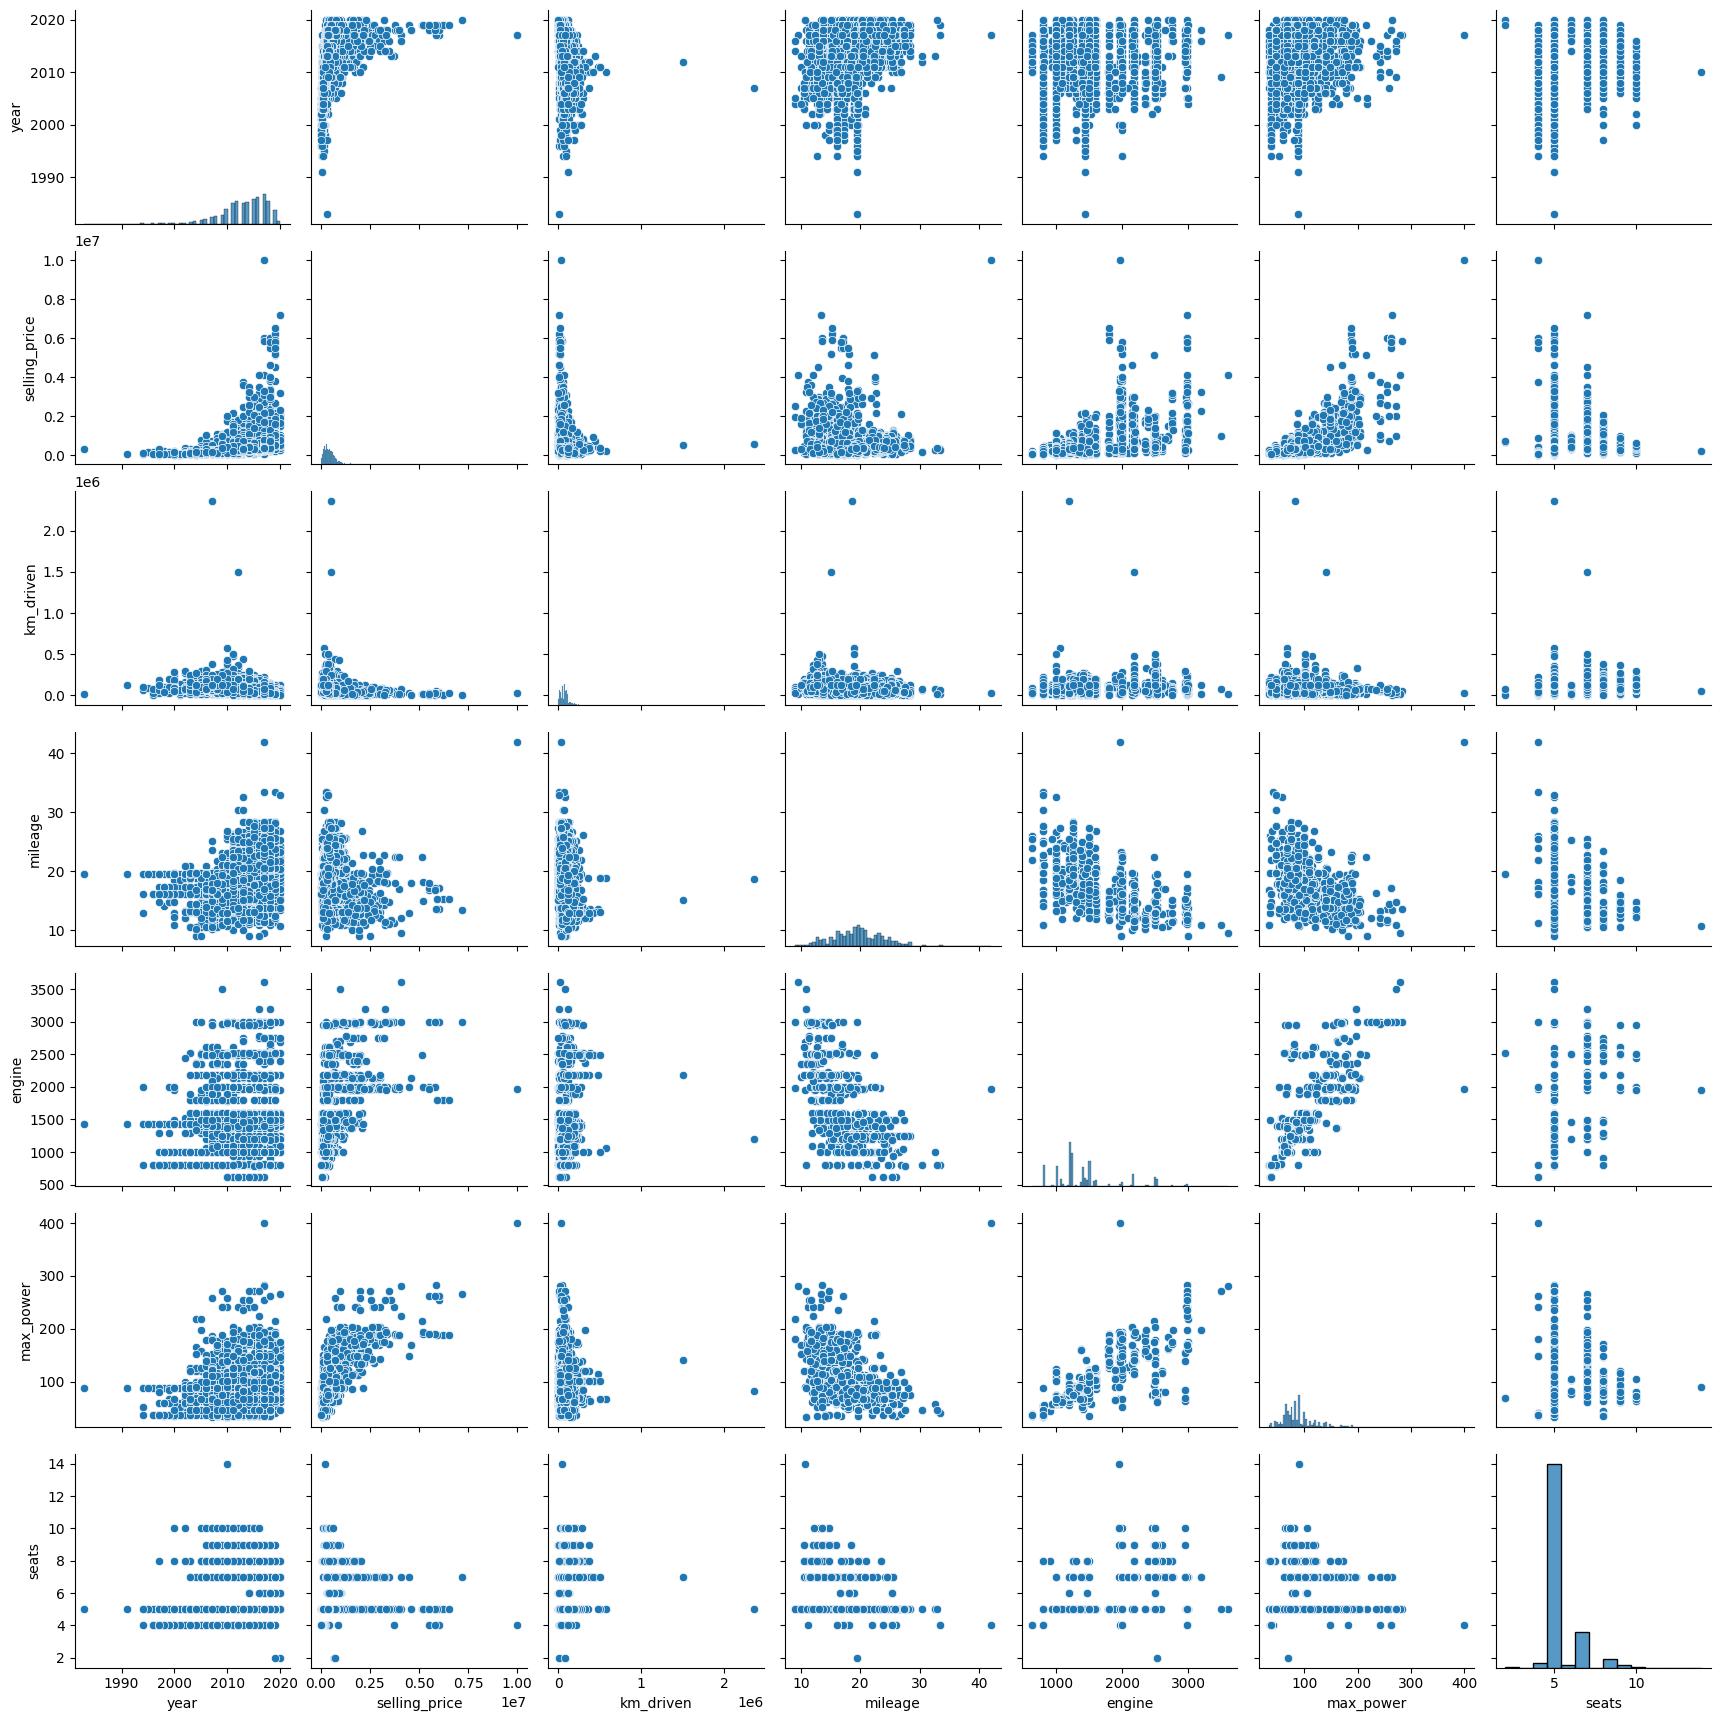

In [23]:
# попарные распределения  train
sns.pairplot(df_train)

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

In [24]:
print("""Сказать можно следующее: значения некоторых признаков/предиеторов демонстрируют связь/корреляцию 
с целевой переменной разной степени выраженности. Например: увеличение "year", "engine", "max_power" 
увеличивает "selling_price", а признаки "mileage", "seats"  демонстрируют обратную зависимость. Большинство признаков
ведут себя естественно, с точки зрения смыслового их значения (например, чем мощнее двигатель ("engeine"), тем дороже 
автомобиль). Есть и неожиданности: обратная корреляция "seats" и "selling_price".
Также стоит отметить наличие "выбросов" значений на графиках, которые снижают читаемость некоторых графиков.
О корреляции признаков можно сказать, что ее также можно налюдать. Например, вполне ожидаемая прямая корреляция 
"km_driven" и "year" (картину смазывают опять же выбросы в данных). Или, еще прямая корреляция "engine" и "max_power". """)

Сказать можно следующее: значения некоторых признаков/предиеторов демонстрируют связь/корреляцию 
с целевой переменной разной степени выраженности. Например: увеличение "year", "engine", "max_power" 
увеличивает "selling_price", а признаки "mileage", "seats"  демонстрируют обратную зависимость. Большинство признаков
ведут себя естественно, с точки зрения смыслового их значения (например, чем мощнее двигатель ("engeine"), тем дороже 
автомобиль). Есть и неожиданности: обратная корреляция "seats" и "selling_price".
Также стоит отметить наличие "выбросов" значений на графиках, которые снижают читаемость некоторых графиков.
О корреляции признаков можно сказать, что ее также можно налюдать. Например, вполне ожидаемая прямая корреляция 
"km_driven" и "year" (картину смазывают опять же выбросы в данных). Или, еще прямая корреляция "engine" и "max_power". 


(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

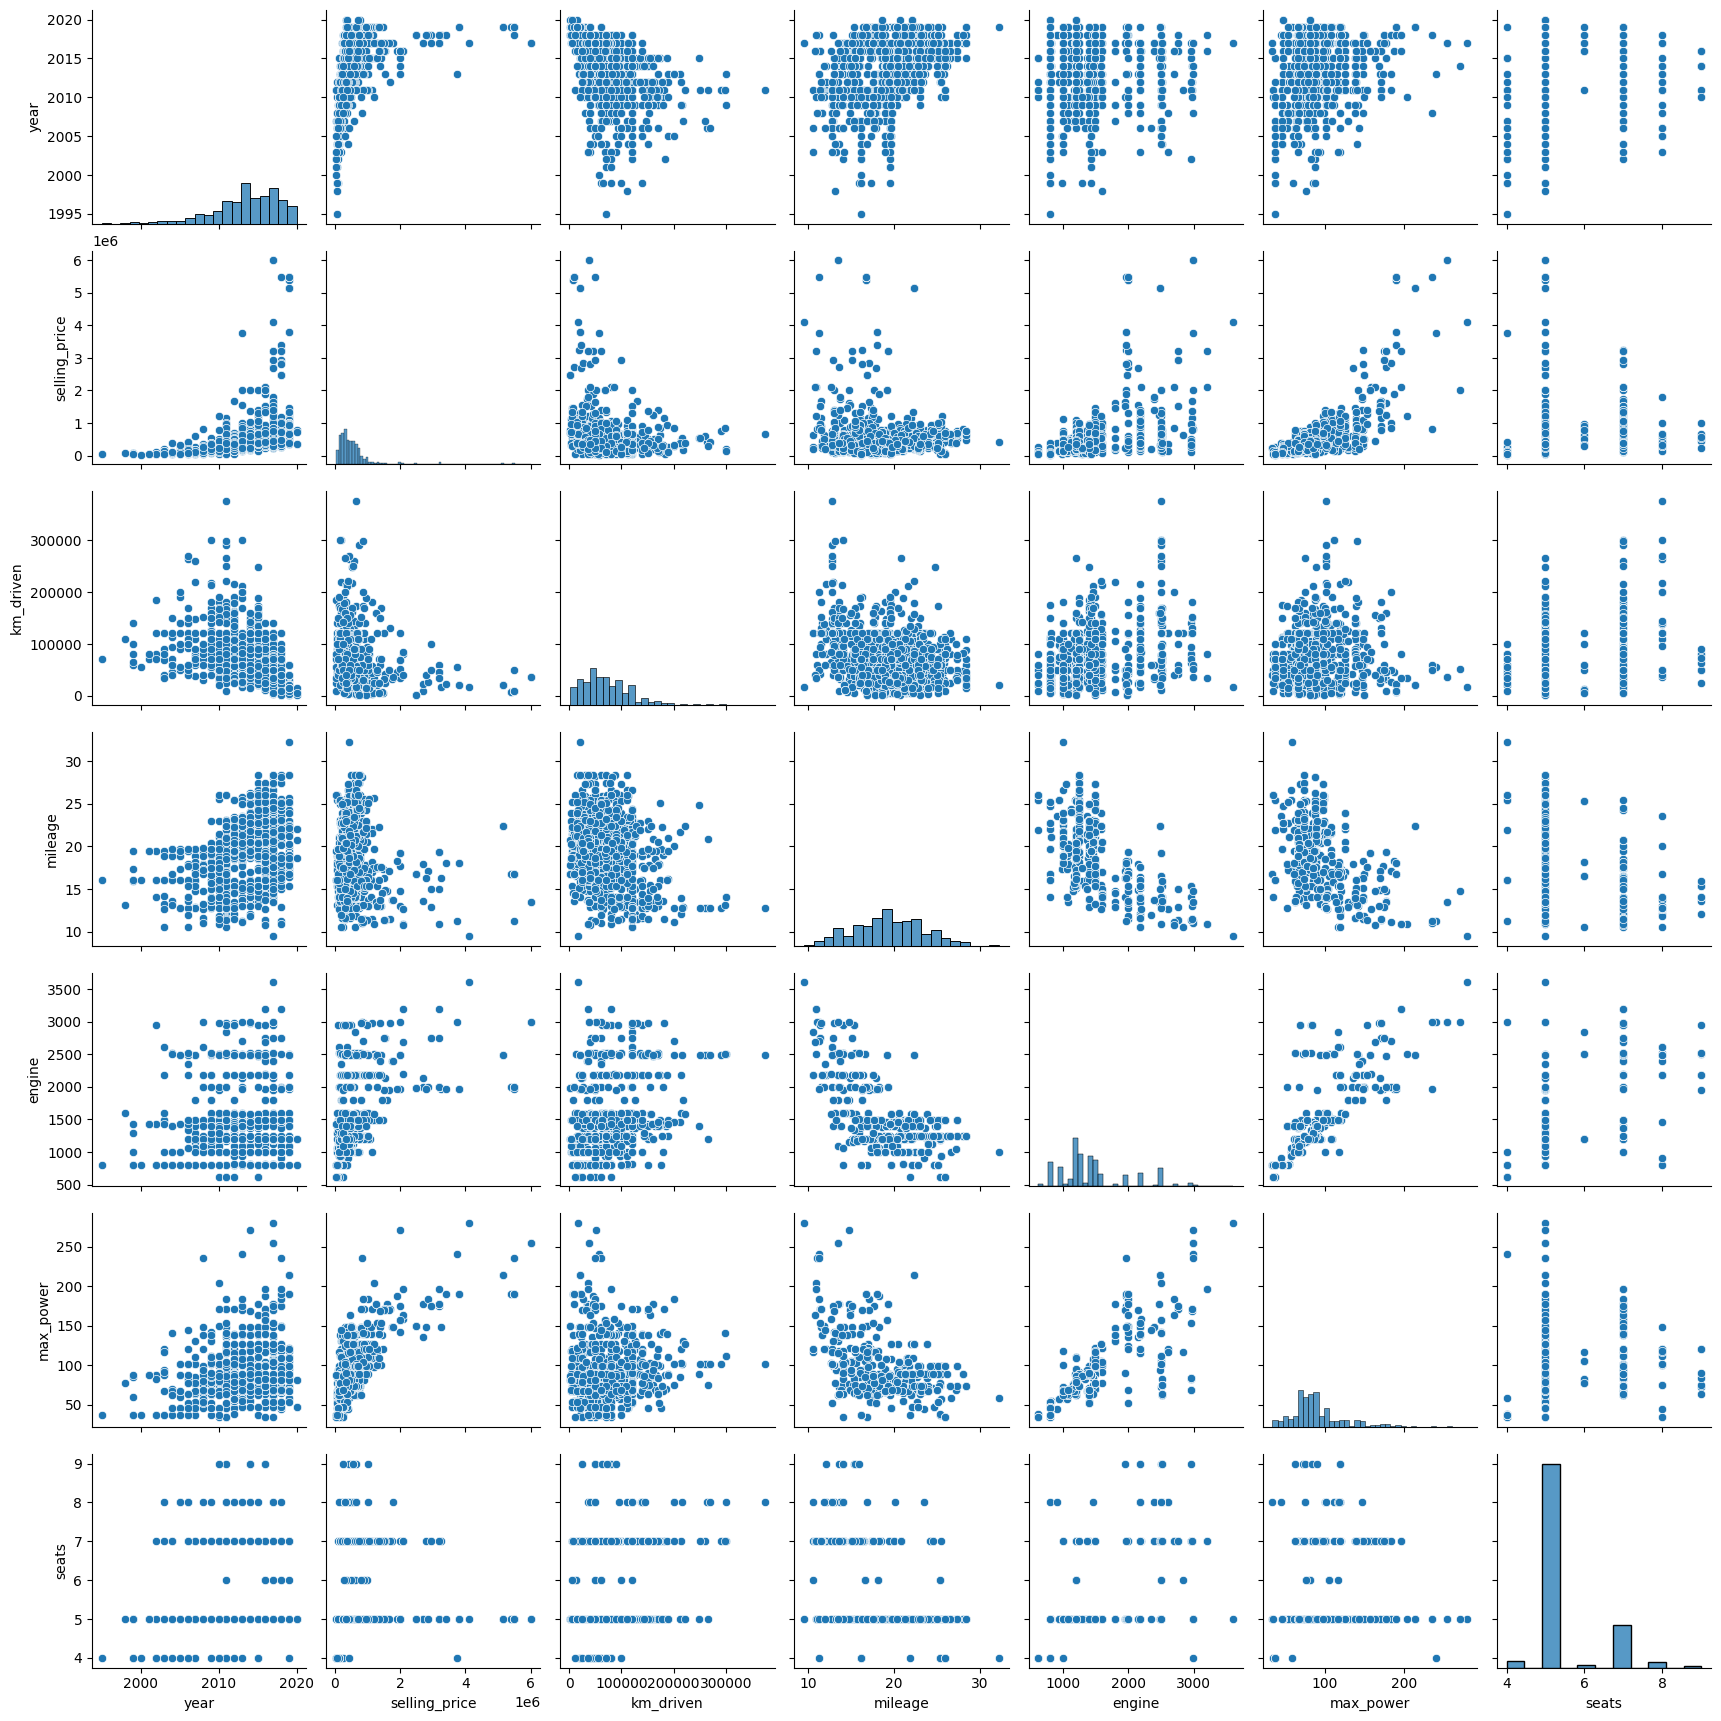

In [25]:
# попарные распределения  test
sns.pairplot(df_test)

Совокупности весьма похожи, аналогичные корреляции на обоих наборах графиков. Можно предположить, что эти наборы
данных train и test подходят для решения задачи. Единственное, "km_driven" в train содержит весьма экстремальные значения
(пример, тех самых "выбросов"), однако корреляции на совокупностях, насколько можно видеть, схожие.
Ниже на картинке отметки на test схожести с train.


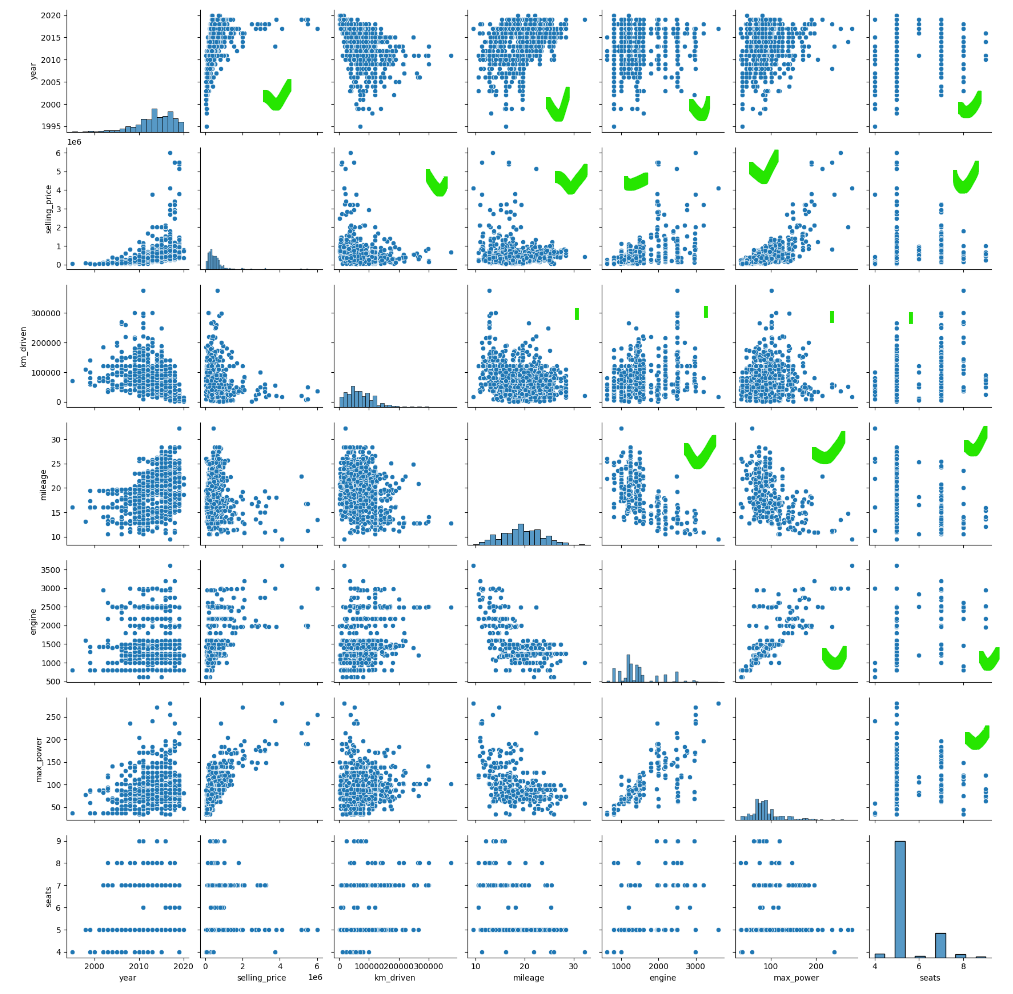

In [26]:
print("""Совокупности весьма похожи, аналогичные корреляции на обоих наборах графиков. Можно предположить, что эти наборы
данных train и test подходят для решения задачи. Единственное, "km_driven" в train содержит весьма экстремальные значения
(пример, тех самых "выбросов"), однако корреляции на совокупностях, насколько можно видеть, схожие.
Ниже на картинке отметки на test схожести с train.""")
from IPython.display import Image
Image(filename='trainVStest.png')

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

<AxesSubplot:>

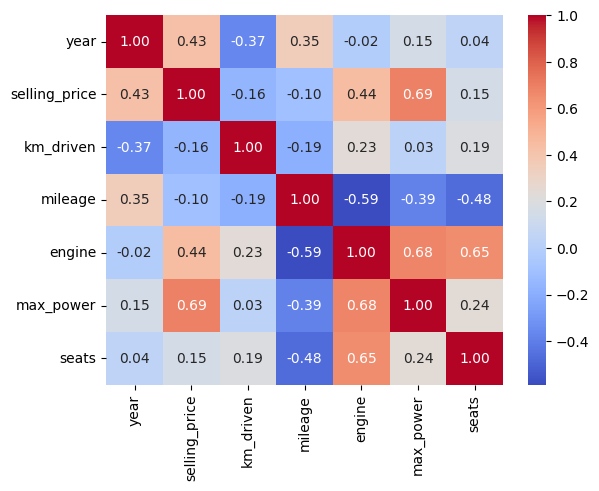

In [27]:
# тепловая карта для train

df_hm = df_train[['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']].corr()
sns.heatmap(df_hm, annot=True, fmt=".2f", cmap= 'coolwarm')

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

In [28]:
print("""
- Признаки "year" и "engine" наименее скоррелированы между собой.
- Довольно сильная положительная линейная зависимость наблюдается между признаками:
    "engine" и "seats", "engine" и "max_power".
- Да, данные показывают, что такое утверждать правильно.""")


- Признаки "year" и "engine" наименее скоррелированы между собой.
- Довольно сильная положительная линейная зависимость наблюдается между признаками:
    "engine" и "seats", "engine" и "max_power".
- Да, данные показывают, что такое утверждать правильно.


(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

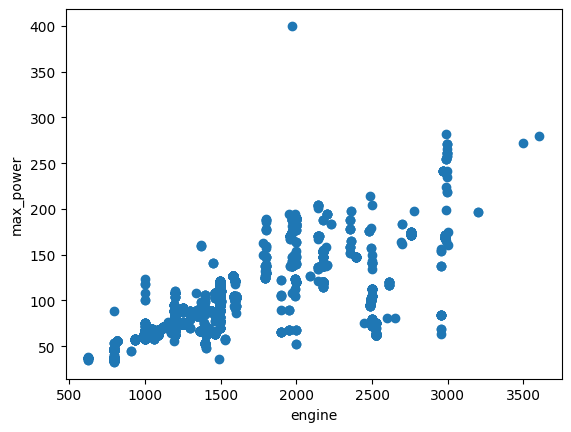

In [29]:
# диаграмма рассеяния
plt.scatter(df_train['engine'], df_train['max_power'])
plt.xlabel('engine')
plt.ylabel('max_power')
plt.show()

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

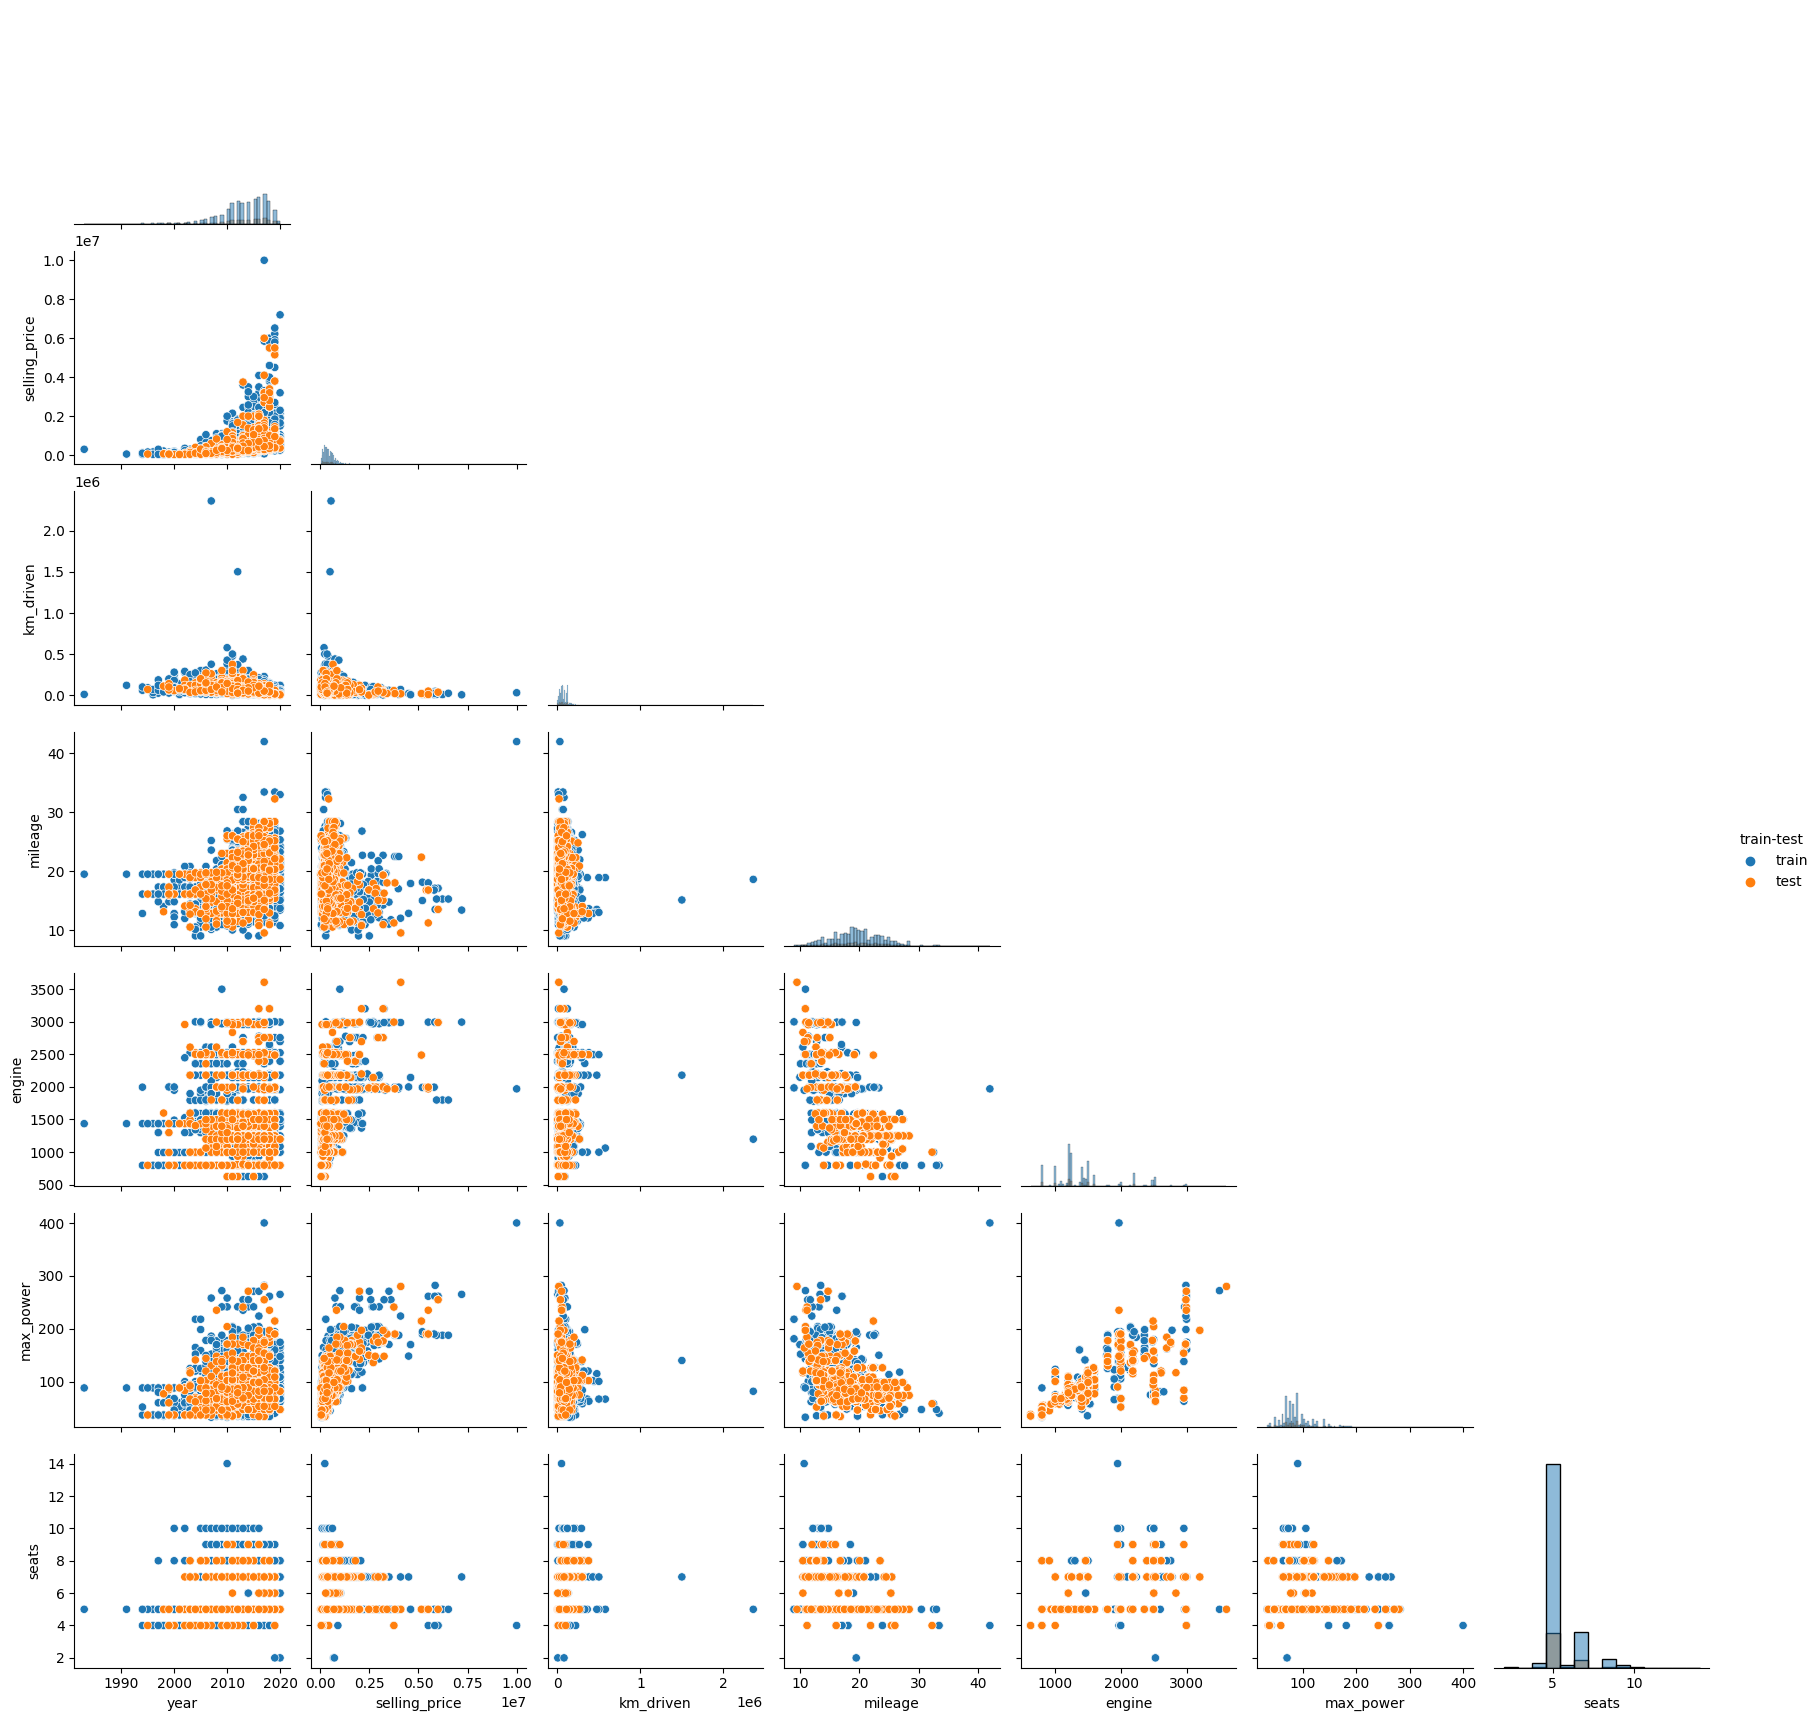

In [30]:
# для сравнения совокупностей удобно train и test нарисовать на одном графике

df_train_new = df_train.copy()
df_test_new = df_test.copy()
df_train_new['train-test'] = 'train'
df_test_new['train-test'] = 'test'
train_test = pd.concat([df_train_new, df_test_new])

sns.pairplot(train_test, hue='train-test', diag_kind="hist", corner=True)

plt.show()

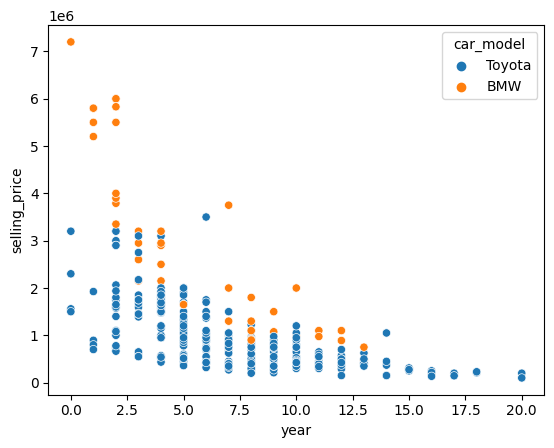

In [31]:
# также весьма важным показателем при продаже авто считается падение цены авто год к году. 
# Чем медленнее падает цена, тем авто охотнее берут. Попробуем на примере определенных марок увидеть разницу на данных.

train_models = df_train.copy()
train_models['car_model'] = train_models.apply(lambda row: row['name'].split()[0], axis = 1)
# print(train_models['car_model'].unique())
train_models['year'] = 2020 - train_models['year'] 
train_models = train_models.loc[(train_models['car_model'] == 'BMW') | (train_models['car_model'] == 'Toyota')]

sns.scatterplot(train_models, x ='year', y='selling_price', hue='car_model')
plt.show()

# судя по графику BMW дешевеет быстрее Toyota

C:\Users\Илья\AppData\Local\Temp\ipykernel_11092\1633859599.py:5: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  extr = train_toobig.quantile(.999).tolist()


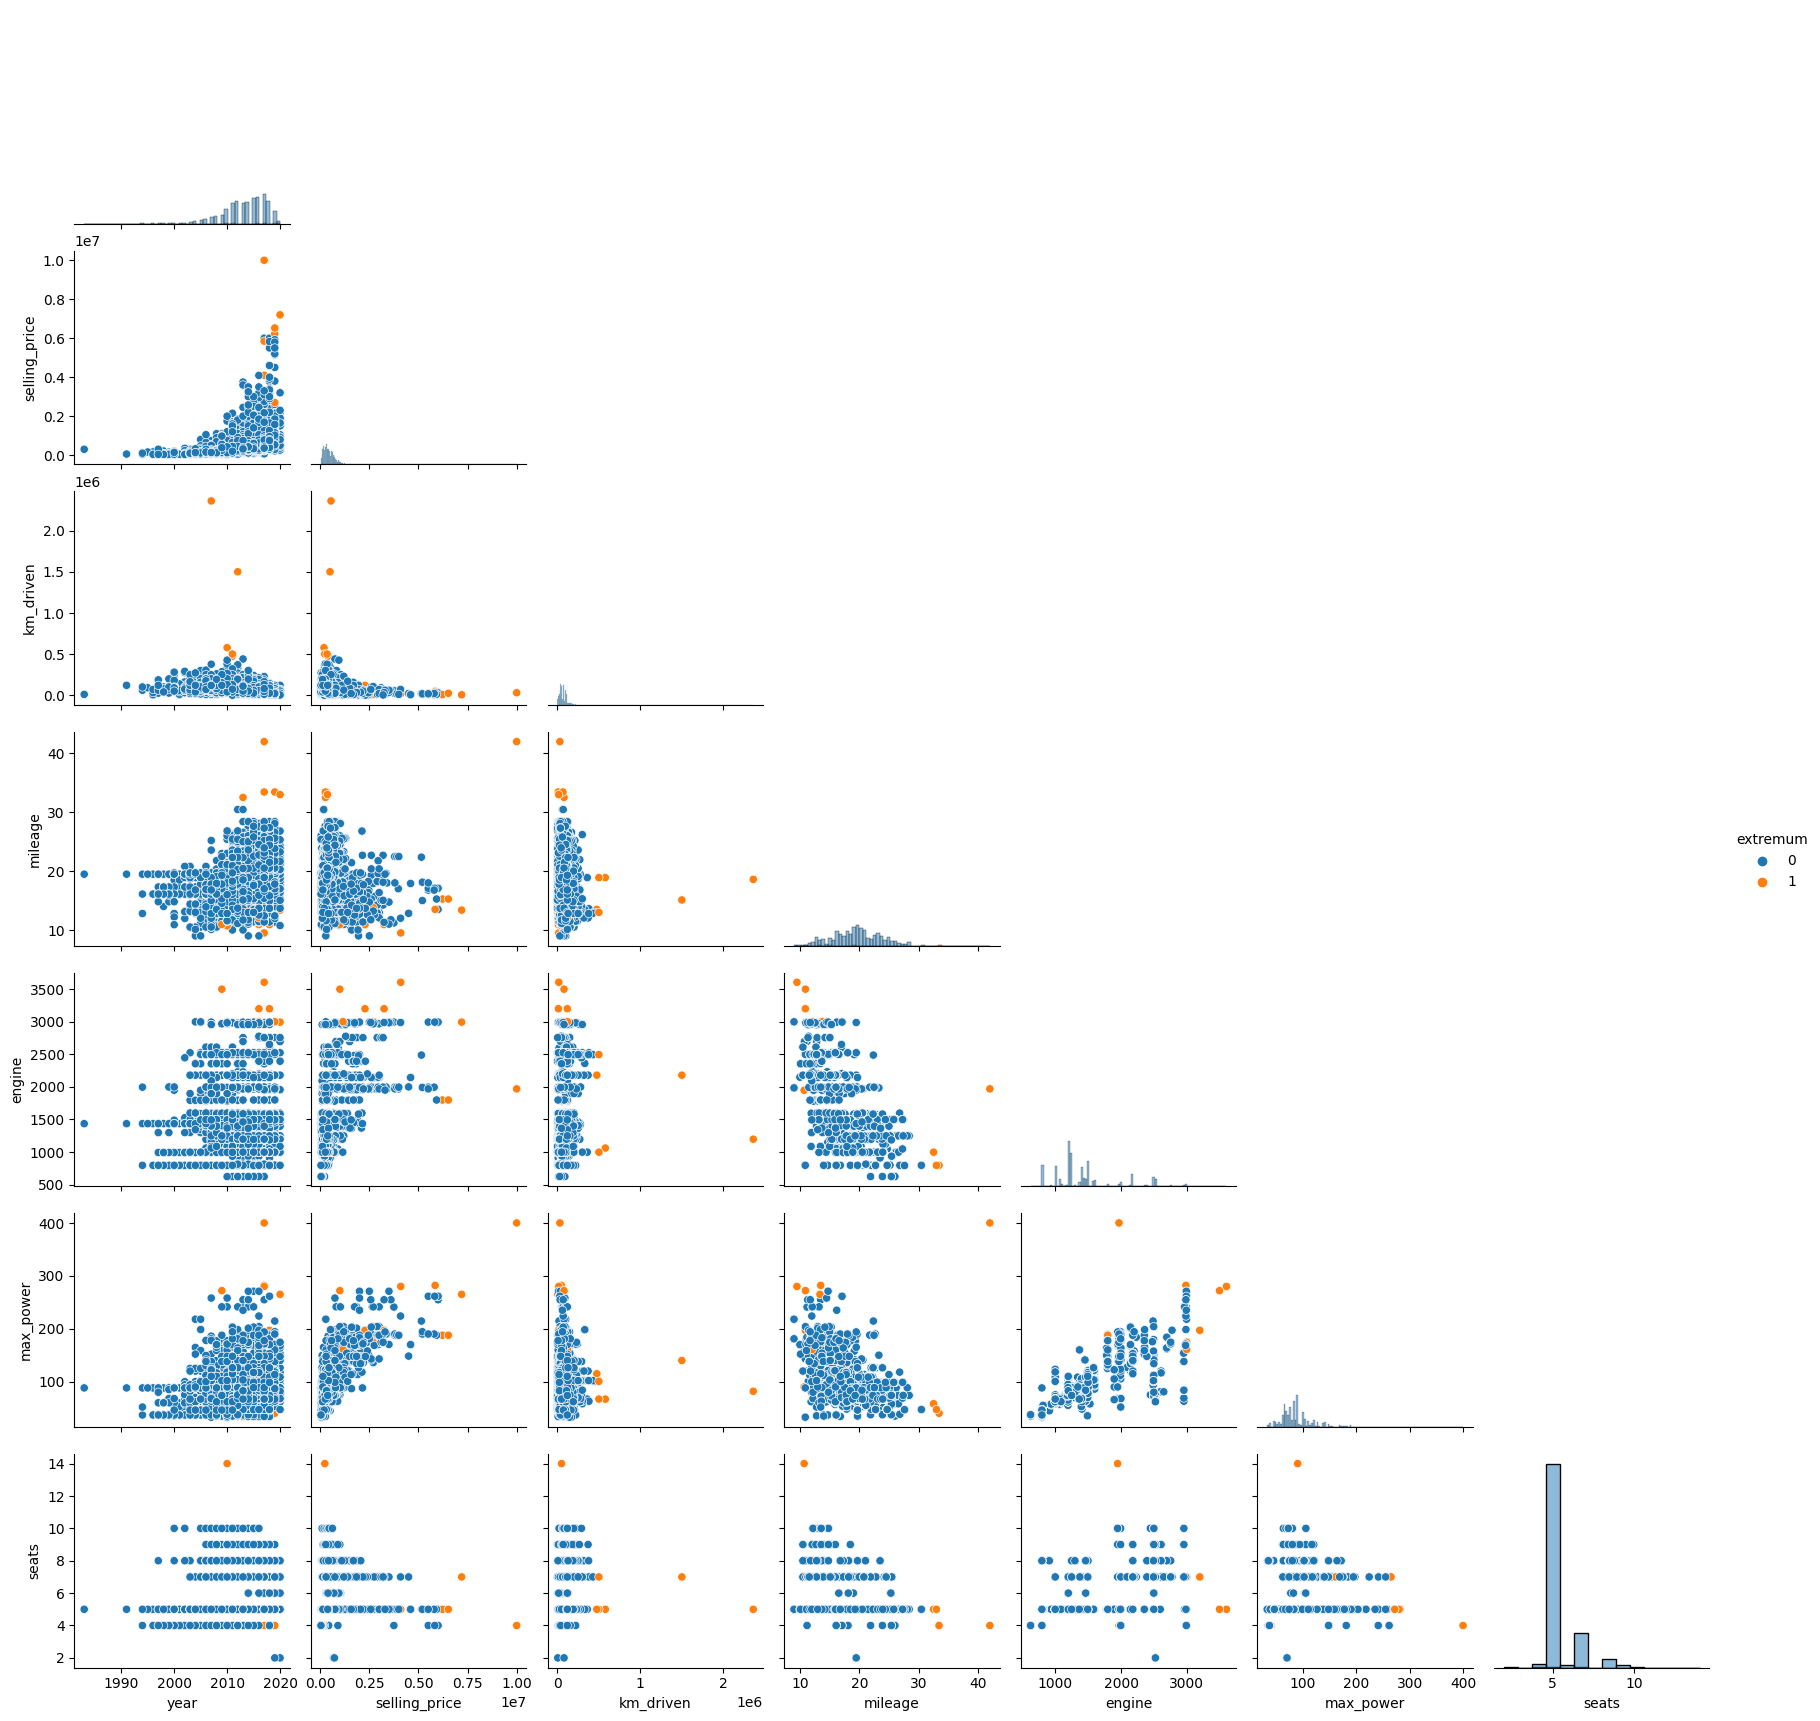

In [32]:
# думаю, было бы полезно "подсветить" "выбросы" значений параметров
# например, подсветим слишком большие 

train_toobig = df_train.copy()
extr = train_toobig.quantile(.999).tolist()

def extrem(row):
    extremum = 0
    if (row['year'] > extr[0]) | (row['selling_price'] > extr[1]) | (row['km_driven'] > extr[2]) | (row['mileage'] > extr[3]) | (row['engine'] > extr[4]) | (row['max_power'] > extr[5]) | (row['seats'] > extr[6]):
        extremum = 1
    return extremum

train_toobig['extremum'] = train_toobig.apply(extrem, axis = 1)

sns.pairplot(train_toobig, hue='extremum', diag_kind="hist", corner=True)

plt.show()

# есть подозрение, что модель может обойтись и без таких экстремальных значений (по некоторым признакам).

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [33]:
y_train = df_train['selling_price'] # целевая переменная для train
X_train = df_train[['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']] # вещественные признаки, train

In [34]:
assert X_train.shape == (5840, 6)

In [35]:
y_test = df_test['selling_price'] # целевая переменная для test
X_test = df_test[['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']] # вещественные признаки, test

In [36]:
assert X_test.shape == (1000, 6)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

# your code here
model = LinearRegression()
model.fit(X_train, y_train)

print('Test R2: ', r2_score(y_test, model.predict(X_test)))
print('Test MSE: ', MSE(y_test, model.predict(X_test)))
print('\n')
print('Train R2: ', r2_score(y_train, model.predict(X_train)))
print('Train MSE: ', MSE(y_train, model.predict(X_train)))

Test R2:  0.5939700276748667
Test MSE:  233397622537.57394


Train R2:  0.5934972716292315
Train MSE:  116519266598.1444


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [38]:
from sklearn.preprocessing import StandardScaler

# стандартизируем фичи
scaler = StandardScaler()
X_train_norm = pd.DataFrame(data=scaler.fit_transform(X_train))
X_train_norm.columns = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']

print(scaler.mean_)
print(scaler.var_)
X_train_norm.head()

[2.01342842e+03 7.39522425e+04 1.94810798e+01 1.43540479e+03
 8.81498258e+01 5.42671233e+00]
[1.67712468e+01 3.60792354e+09 1.49776023e+01 2.34744911e+05
 9.95765807e+02 9.64834397e-01]


,year,km_driven,mileage,engine,max_power,seats
0,0.14,1.19,1.01,-0.39,-0.45,-0.43
1,0.14,0.77,0.43,0.13,0.49,-0.43
2,-0.84,0.88,0.91,-0.08,0.06,-0.43
3,-1.57,0.77,-0.87,-0.28,0.00,-0.43
4,0.87,-0.48,0.17,-0.49,-0.20,-0.43


In [39]:
# посмотрим на линейную регрессию на стандартизированных фич
model = LinearRegression()
model.fit(X_train_norm, y_train)

X_test_norm = pd.DataFrame(data=scaler.transform(X_test))

print('Test R2: ', r2_score(y_test, model.predict(X_test_norm)))
print('Test MSE: ', MSE(y_test, model.predict(X_test_norm)))
print('\n')
print('Train R2: ', r2_score(y_train, model.predict(X_train_norm)))
print('Train MSE: ', MSE(y_train, model.predict(X_train_norm)))

# значения R2-метрики схожи, явного переобучения не наблюдается

Test R2:  0.5939700276748776
Test MSE:  233397622537.56763


Train R2:  0.5934972716292313
Train MSE:  116519266598.14444


C:\Users\Илья\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Илья\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [40]:
# веса линейной регрессии
print(model.intercept_)
model.coef_

522960.09109588683


array([154797.72420021, -43690.30726126,  33523.1174204 ,  60011.94296484,
       324673.63487728, -19066.55894474])

Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [41]:
# Не очень результативно - да уж..
print(""" Наиболее информативным признаком оказался: "max_power" """)

 Наиболее информативным признаком оказался: "max_power" 


(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [42]:
from sklearn.linear_model import Lasso

# попробуем Lasso. Веса изменились не значительно.
model_l1 = Lasso(alpha=1000)
model_l1.fit(X_train_norm, y_train)

print(model_l1.intercept_)
model_l1.coef_

522960.09109588683


array([154479.82567661, -42608.12619753,  31762.04241599,  55319.17254032,
       325535.87749402, -16264.61282468])

In [43]:
# метрики Lasso
print('Test R2: ', r2_score(y_test, model_l1.predict(X_test_norm)))
print('Test MSE: ', MSE(y_test, model_l1.predict(X_test_norm)))
print('\n')
print('Train R2: ', r2_score(y_train, model_l1.predict(X_train_norm)))
print('Train MSE: ', MSE(y_train, model_l1.predict(X_train_norm)))

Test R2:  0.5928119597045616
Test MSE:  234063313076.2756


Train R2:  0.5934632666292338
Train MSE:  116529013734.8396


C:\Users\Илья\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
C:\Users\Илья\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [44]:
# your code here
print(""" L1-регуляризация с параметрами по умолчанию не занулила никаких весов. Видимо, совсем незначимых параметров нет.
Если увеличить параметр alpha до 10000, то можно занулить один из весов ('seats'), но при этом снижается качетсво (R2). """)

 L1-регуляризация с параметрами по умолчанию не занулила никаких весов. Видимо, совсем незначимых параметров нет.
Если увеличить параметр alpha до 10000, то можно занулить один из весов ('seats'), но при этом снижается качетсво (R2). 


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [45]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

# попробуем подобрать alpha и tol
params = {'alpha': np.arange(0, 100000, 1000), 'tol': np.arange(0.0001, 0.01, 0.001)} 

gs = GridSearchCV(Lasso(), params, cv=10, scoring=('r2')) #,'r2','neg_mean_squared_error'), refit=False)

gs.fit(X_train_norm, y_train)

gs.best_params_, gs.best_score_, gs.n_splits_, gs.best_estimator_

({'alpha': 27000, 'tol': 0.0001}, 0.5758908310188989, 10, Lasso(alpha=27000))

In [46]:
# следует отметить снижение R2 на тесте и обнуление аж 3(!) весов
lr_l1 = gs.best_estimator_
lr_l1.fit(X_train_norm, y_train)

print('Test R2: ', r2_score(y_test, lr_l1.predict(X_test_norm)))
print('Test MSE: ', MSE(y_test, lr_l1.predict(X_test_norm)))
print('\n')
print('Train R2: ', r2_score(y_train, lr_l1.predict(X_train_norm)))
print('Train MSE: ', MSE(y_train, lr_l1.predict(X_train_norm)))
print('\n')
print('Intercept + Coef[]: ', lr_l1.intercept_, lr_l1.coef_)


Test R2:  0.5645087569390068
Test MSE:  250332802241.9414


Train R2:  0.5833536527436924
Train MSE:  119426816660.431


Intercept + Coef[]:  522960.09109588695 [148910.44969572 -14785.05691516      0.              0.
 321165.59443589     -0.        ]


<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

In [47]:
# your code here
print(""" 
- Грид-серчу пришлось обучить 100 (alpha) х 10 (tol) x 10 (cv) = 10000 моделей.
- Согласно грид-серчу, у лучшей модели коэффициент регуляризации alpha=27000.
- При alpha=27000 обнуляется аж 3(!) веса ('mileage', 'engine', 'seats').
""")

 
- Грид-серчу пришлось обучить 100 (alpha) х 10 (tol) x 10 (cv) = 10000 моделей.
- Согласно грид-серчу, у лучшей модели коэффициент регуляризации alpha=27000.
- При alpha=27000 обнуляется аж 3(!) веса ('mileage', 'engine', 'seats').



(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [48]:
from sklearn.linear_model import ElasticNet

# попробуем ElasticNet
params = {'alpha': np.arange(1, 100000, 1000), 'l1_ratio': np.arange(0, 1, 0.1)} 

gs_en = GridSearchCV(ElasticNet(), params, cv=10, scoring=('r2'))

gs_en.fit(X_train_norm, y_train)

gs_en.best_params_, gs_en.best_score_, gs_en.n_splits_, gs_en.best_estimator_

({'alpha': 1, 'l1_ratio': 0.9},
 0.5770547883637914,
 10,
 ElasticNet(alpha=1, l1_ratio=0.9))

<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [49]:
# your code here
print(""" ElasticNet(alpha=1, l1_ratio=0.9) 
Судя по l1_ratio - оптимальная модель ближе к L1
Судя по alpha - оптимальная модель ближе к линейной регрессии """)

 ElasticNet(alpha=1, l1_ratio=0.9) 
Судя по l1_ratio - оптимальная модель ближе к L1
Судя по alpha - оптимальная модель ближе к линейной регрессии 


Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.75 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [50]:
# удалим 'selling_price' и 'name'
X_train_cat = df_train.drop(['selling_price', 'name'], axis=1)

In [51]:
assert X_train_cat.shape == (5840, 10)

In [52]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


In [53]:
X_train_cat.describe(include='all')

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
count,5840.00,5840.00,5840,5840,5840,5840,5840.00,5840.00,5840.00,5840.00
unique,NaN,NaN,4,3,2,5,NaN,NaN,NaN,NaN
top,NaN,NaN,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN
freq,NaN,NaN,3177,5223,5336,3603,NaN,NaN,NaN,NaN
mean,2013.43,73952.24,NaN,NaN,NaN,NaN,19.48,1435.40,88.15,5.43
std,4.10,60071.14,NaN,NaN,NaN,NaN,3.87,484.55,31.56,0.98
min,1983.00,1.00,NaN,NaN,NaN,NaN,9.00,624.00,32.80,2.00
25%,2011.00,39000.00,NaN,NaN,NaN,NaN,17.00,1197.00,68.00,5.00
50%,2014.00,70000.00,NaN,NaN,NaN,NaN,19.48,1248.00,82.00,5.00
75%,2017.00,100000.00,NaN,NaN,NaN,NaN,22.30,1498.00,99.00,5.00


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [54]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas


# OneHot от sklearn
from sklearn.compose import make_column_transformer

ohe = OneHotEncoder(handle_unknown='ignore', drop='first')

transformer = make_column_transformer((ohe, ['fuel', 'seller_type', 'transmission', 'owner', 'seats']), 
                                      remainder='passthrough')

transformed = transformer.fit_transform(X_train_cat)
X_train_ohe_nostd = pd.DataFrame(transformed, columns=transformer.get_feature_names())
X_train_ohe = X_train_ohe_nostd.drop(['year', 'km_driven', 'mileage', 'engine', 'max_power'], axis=1)

X_train_ohe = pd.concat([X_train_ohe, X_train_norm], axis=1) 
X_train_ohe = X_train_ohe.drop(['seats'], axis=1)

print(X_train_ohe.shape)
X_train_ohe.head()

# много строк вышло, скорее всего, можно как-то короче это сделать

(5840, 23)


,onehotencoder__x0_Diesel,onehotencoder__x0_LPG,onehotencoder__x0_Petrol,onehotencoder__x1_Individual,onehotencoder__x1_Trustmark Dealer,onehotencoder__x2_Manual,onehotencoder__x3_Fourth & Above Owner,onehotencoder__x3_Second Owner,onehotencoder__x3_Test Drive Car,onehotencoder__x3_Third Owner,...,onehotencoder__x4_7,onehotencoder__x4_8,onehotencoder__x4_9,onehotencoder__x4_10,onehotencoder__x4_14,year,km_driven,mileage,engine,max_power
0,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.14,1.19,1.01,-0.39,-0.45
1,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.14,0.77,0.43,0.13,0.49
2,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,-0.84,0.88,0.91,-0.08,0.06
3,0.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,-1.57,0.77,-0.87,-0.28,0.00
4,0.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.87,-0.48,0.17,-0.49,-0.20


In [55]:
# Добавляем категориальные фичи с помощью get_dummies

X_train_ohe_gd = pd.get_dummies(X_train_cat, columns=['fuel', 'seller_type', 'transmission', 'owner', 'seats'], drop_first=True)
X_train_ohe_gd.head()

,year,km_driven,mileage,engine,max_power,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,...,owner_Test Drive Car,owner_Third Owner,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9,seats_10,seats_14
0,2014,145500,23.40,1248,74.00,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,2014,120000,21.14,1498,103.52,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,2010,127000,23.00,1396,90.00,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,2007,120000,16.10,1298,88.20,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
4,2017,45000,20.14,1197,81.86,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0


In [56]:
# Использую линейную модель -- стандартизирую фичи
# Хоть выше это и было, но сделаю и здесь, так удобнее и в голове лучше откладывается

scaler_res = StandardScaler()
num_column_list = ['year', 'km_driven', 'mileage', 'engine', 'max_power']
X_train_ohe_gd[num_column_list] = scaler_res.fit_transform(X_train_ohe_gd[num_column_list])

# готовый датафрейм, со стандартизацией и onehot для категорий. С ним и будем работать дальше.
X_train_ohe_gd.head()

,year,km_driven,mileage,engine,max_power,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,...,owner_Test Drive Car,owner_Third Owner,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9,seats_10,seats_14
0,0.14,1.19,1.01,-0.39,-0.45,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,0.14,0.77,0.43,0.13,0.49,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,-0.84,0.88,0.91,-0.08,0.06,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,-1.57,0.77,-0.87,-0.28,0.00,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0.87,-0.48,0.17,-0.49,-0.20,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0


In [57]:
# для удобного вывода np.array (отсюда: https://stackoverflow.com/questions/21008858/formatting-floats-in-a-numpy-array)
float_formatter = "{:.5f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})

# значения для Fast API части
print(scaler_res.mean_)
print(scaler_res.scale_)

[2013.42842 73952.24247 19.48108 1435.40479 88.14983]
[4.09527 60065.99321 3.87009 484.50481 31.55576]


(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [58]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# попробуем и Ridge
params = {'alpha': np.arange(0, 50, 1)} 

gs_rid = GridSearchCV(Ridge(), params, cv=10, scoring=('r2')) 

gs_rid.fit(X_train_ohe_gd, y_train)

gs_rid.best_params_, gs_rid.best_score_, gs_rid.n_splits_, gs_rid.best_estimator_

({'alpha': 8}, 0.6234577821220589, 10, Ridge(alpha=8))

In [59]:
print(""" Качество предсказаний удалось улучшить, хоть и не радикально.
Скорее всего, благодаря учету категориальных фич, чем самому алгоритму Ridge. """)

 Качество предсказаний удалось улучшить, хоть и не радикально.
Скорее всего, благодаря учету категориальных фич, чем самому алгоритму Ridge. 


In [60]:
# подготовим test для оценки качества

X_test_cat = df_test.drop(['selling_price', 'name'], axis=1)

X_test_ohe_gd = pd.get_dummies(X_test_cat, columns=['fuel', 'seller_type', 'transmission', 'owner', 'seats'], drop_first=True)

X_test_ohe_gd[num_column_list] = scaler_res.transform(X_test_ohe_gd[num_column_list])
print(X_test_ohe_gd.shape)
X_test_ohe_gd.head()

# Как выяснилось у test другое количество категориальных значений признаков, для проверки он в таком виде не годится

(1000, 20)


,year,km_driven,mileage,engine,max_power,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,seats_5,seats_6,seats_7,seats_8,seats_9
0,-0.84,1.57,-1.42,2.19,0.76,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0
1,0.87,-0.81,0.52,0.13,0.64,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0
2,-1.57,2.41,-1.70,0.75,1.33,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0
3,0.38,1.65,1.45,0.13,0.33,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0
4,-0.59,-0.07,-0.77,-0.54,-0.73,0,0,1,1,0,1,0,1,0,0,1,0,0,0,0


In [61]:
# Линейная регрессия на датафрейме со стандартизацией и onehot дает R2 выше, чем Ridge
# Что ж, это и есть лучшая модель. Проблем с производительностью (относительно других моделей) не замечено.
# Получаются очень большие значения весов (но а чего я ждал после стандартизации фичей).
# Также смущает большой MSE (корень из MSE = 59% от mean целевой переменной). Виню "выбросы" данных в train.

model = LinearRegression()
model.fit(X_train_ohe_gd, y_train)

# веса для Fast API части
print(model.intercept_)
print(model.coef_)

print('\n')
print('Train R2: ', r2_score(y_train, model.predict(X_train_ohe_gd)))
print('Train MSE: ', MSE(y_train, model.predict(X_train_ohe_gd)))

852455.3938145775
[150402.73037 -29330.27968 41933.16188 47378.52736 284503.56973
 48902.67853 188546.62657 -1004.23705 -98510.88059 -117336.06978
 -283405.94728 -40751.01700 -51781.86892 3307447.75974 -37331.00983
 598017.58381 -6287.45505 -95874.44947 6532.84706 49515.02942 33519.66154
 64985.62063 -141995.09575]


Train R2:  0.6689037770617916
Train MSE:  94904871179.58041


In [62]:
from joblib import dump, load
dump(model, 'model.joblib')

['model.joblib']

In [63]:
import pickle
filename = 'model.pickle'
pickle.dump(model, open(filename, 'wb'))

# Часть 4 - бонусная (2 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [64]:
# не успел :(

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [65]:
def business_metrics(y_true, y_pred):
    # возвращает долю предиктов в процентах, попадающих в интервал +-10% от реальных значений
    result = []
    for a in range(len(y_true)):
        err = abs((y_true[a]-y_pred[a])*100/y_true[a])
        if err > 10:
            result.append(0)
        else:
            result.append(1)
            
    return sum(result)*100/len(result)


# протестируем функцию
XXX = X_train_ohe_gd #df_train[['year', 'km_driven', 'mileage', 'engine', 'max_power']]

model_1 = LinearRegression()
model_1.fit(XXX, y_train)
y_pred = model_1.predict(XXX)

print(business_metrics(y_train, y_pred))

# print(model_1.intercept_)
# print(model_1.coef_)

y_pred = pd.DataFrame(y_pred)
pd.concat([y_train, y_pred], axis=1)


21.335616438356166


,selling_price,0
0,450000,395771.57
1,370000,622550.11
2,225000,412294.22
3,130000,155052.96
4,440000,535671.85
...,...,...
5835,120000,-79216.37
5836,260000,168574.63
5837,320000,348184.52
5838,135000,387896.99


In [66]:
print("""Качество предсказания лучшей модели даже на подготовленных данных оставляет желать лучшего :(
21.3% (кастомная бизнес-метрика) попаданий в +-10% ошибки по стоимости - не то чтобы сильно обрадуют владельца автосалонов.
PS: Если где-то и допустил ошибку, то найти ее не получилось. """)

Качество предсказания лучшей модели даже на подготовленных данных оставляет желать лучшего :(
21.3% (кастомная бизнес-метрика) попаданий в +-10% ошибки по стоимости - не то чтобы сильно обрадуют владельца автосалонов.
PS: Если где-то и допустил ошибку, то найти ее не получилось. 


# Часть 5 (3 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [67]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str 
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

In [68]:
# для заполнения pickle и написания функций
X_train_ohe_gd.describe(include='all')

,year,km_driven,mileage,engine,max_power,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,...,owner_Test Drive Car,owner_Third Owner,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9,seats_10,seats_14
count,5840.00,5840.00,5840.00,5840.00,5840.00,5840.00,5840.00,5840.00,5840.00,5840.00,...,5840.00,5840.00,5840.00,5840.00,5840.00,5840.00,5840.00,5840.00,5840.00,5840.00
mean,0.00,-0.00,-0.00,-0.00,-0.00,0.54,0.01,0.44,0.89,0.00,...,0.00,0.08,0.02,0.79,0.01,0.14,0.03,0.01,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,0.50,0.08,0.50,0.31,0.07,...,0.03,0.27,0.13,0.41,0.09,0.34,0.18,0.11,0.06,0.01
min,-7.43,-1.23,-2.71,-1.67,-1.75,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,-0.59,-0.58,-0.64,-0.49,-0.64,0.00,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.14,-0.07,0.00,-0.39,-0.19,1.00,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.87,0.43,0.73,0.13,0.34,1.00,0.00,1.00,1.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
max,1.60,38.07,5.82,4.48,9.88,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [69]:
# для заполнения pickle и написания функций
nodummies = X_train_ohe_gd.drop(['year', 'km_driven', 'mileage', 'engine', 'max_power'], axis=1)
nodummies.head()

,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9,seats_10,seats_14
0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0
2,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [70]:
# для заполнения pickle и написания функций
df_train['seats'].unique()

array([ 5,  4,  7,  8,  6,  9, 10, 14,  2])

In [71]:
# добъемся работоспособного кода в ноутбуке, потом уже в IDE
# здесь использован весьма примитивный подход, без pickle файла
# реализовано в VAR1_main.py

import re 

def unscale(x, scaler_mean_, scaler_scale_):
    # стандартизация значения
    return (x - scaler_mean_)/scaler_scale_

def itemTOrow(item: Item):
    # по item на вход формирует на выход список с коэффициентами согласно модели
    
    row = []
    scaler_mean_ = [2013.42842, 73952.24247, 19.48108, 1435.40479, 88.14983]
    scaler_scale_ = [4.09527, 60065.99321, 3.87009, 484.50481, 31.55576]
    fuel = {'Diesel': [1, 0, 0], 'Petrol': [0, 0, 1], 'LPG': [0, 1, 0], 'CNG': [0, 0, 0]}
    seller_type = {'Individual': [1, 0], 'Dealer': [0, 0], 'Trustmark Dealer': [0, 1]}
    transmission = {'Manual': [1], 'Automatic': [0]}
    owner = {'First Owner': [0, 0, 0, 0], 'Second Owner': [0, 1, 0, 0], 'Third Owner': [0, 0, 0, 1], 
             'Fourth & Above Owner': [1, 0, 0, 0], 'Test Drive Car': [0, 0, 1, 0]}
    seats = {5: [0, 1, 0, 0, 0, 0, 0, 0], 4: [1, 0, 0, 0, 0, 0, 0, 0], 7: [0, 0, 0, 1, 0, 0, 0, 0], 
             8: [0, 0, 0, 0, 1, 0, 0, 0], 6: [0, 0, 1, 0, 0, 0, 0, 0], 9: [0, 0, 0, 0, 0, 1, 0, 0],
             10: [0, 0, 0, 0, 0, 0, 1, 0], 14: [0, 0, 0, 0, 0, 0, 0, 1], 2: [0, 0, 0, 0, 0, 0, 0, 0]}
    
    row.append(unscale(item.year, scaler_mean_[0], scaler_scale_[0]))
    row.append(unscale(item.km_driven, scaler_mean_[1], scaler_scale_[1]))
    mileage = float(re.sub(r'[/ a-zA-Z]','',item.mileage))
    row.append(unscale(mileage, scaler_mean_[2], scaler_scale_[2]))
    engine = float(re.sub(r'[/ a-zA-Z]','',item.engine))
    row.append(unscale(engine, scaler_mean_[3], scaler_scale_[3]))
    max_power = float(re.sub(r'[/ a-zA-Z]','',item.max_power))
    row.append(unscale(max_power, scaler_mean_[4], scaler_scale_[4]))
    
    row.extend(fuel[item.fuel])
    row.extend(seller_type[item.seller_type])
    row.extend(transmission[item.transmission])
    row.extend(owner[item.owner])
    row.extend(seats[item.seats])   
    
    return row

def selling_price_calc(row):
    # возвращает прогнозируемую стоимость авто
    
    model_coef_ = np.array([150402.73037, -29330.27968, 41933.16188, 47378.52736, 284503.56973, 48902.67853,
                            188546.62657, -1004.23705, -98510.88059, -117336.06978, -283405.94728,
                            -40751.01700, -51781.86892, 3307447.75974, -37331.00983, 598017.58381,
                            -6287.45505, -95874.44947, 6532.84706, 49515.02942, 33519.66154, 64985.62063,
                            -141995.09575])
    model_intercept_ = 852455.3938145775
    
    price = row @ model_coef_ + model_intercept_
    
    return round(price, 0)

In [72]:
# тестовый айтем 

item = Item(
    name='Maruti Swift Dzire ZDI',
    year = 2015,
    selling_price = 525000,
    km_driven = 40000,
    fuel = 'Diesel',
    seller_type = 'Individual',
    transmission = 'Manual',
    owner = 'First Owner',
    mileage = '26.59 kmpl',
    engine = '1248 CC',
    max_power = '74.0 bhp',
    torque = '160Nm@ 2000rpm',
    seats = 5.0
    )


testlist = itemTOrow(item)
price = selling_price_calc(testlist)
price
# на этом айтеме отработало и даже приличны результат выдает (1.2% ошибка)

518578.0

In [73]:
# строка для тестов
X_train_ohe_gd.iloc[[20]] #.values.tolist()

,year,km_driven,mileage,engine,max_power,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,...,owner_Test Drive Car,owner_Third Owner,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9,seats_10,seats_14
20,0.38,-0.57,1.84,-0.39,-0.45,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [74]:
# добъемся работоспособного кода в ноутбуке, потом уже в IDE
# здесь использован подход с pickle файлом
# реализовано в VAR2main.py

# @app.post("/predict_item")
def predict_item(item: Item) -> float:
    row = np.asarray(itemTOrow(item))
    row = row.reshape(1, -1)
    loaded_model = pickle.load(open('model.pickle', 'rb'))
    result = loaded_model.predict(row)

    return result[0]

# @app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    rows = []
    
    for item in items:
        row = itemTOrow(item)
        rows.append(row)
    
#     rows = np.asarray(rows)
#     row = row.reshape(1, -1)
    loaded_model = pickle.load(open('model.pickle', 'rb'))
    result = loaded_model.predict(rows)
    
    return result

listt = [item, item, item]
testlist = predict_items(listt)

testlist

array([518577.68922, 518577.68922, 518577.68922])

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link